In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Базовая работа с изображением

In [2]:
image = cv2.imread('sar_2_color.jpg')

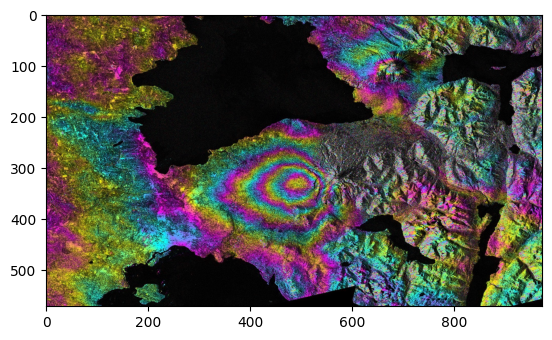

In [3]:
plt.imshow(image)

In [4]:
image.shape # h,w,c

(572, 974, 3)

In [5]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [6]:
# ROI
img_roi = image[100:200, 500:700]

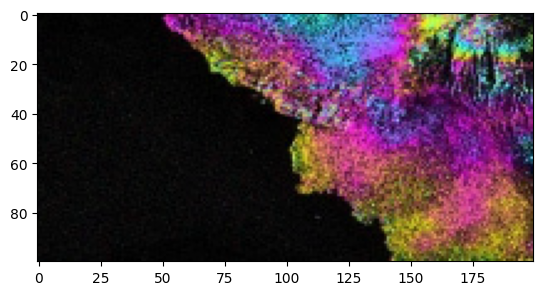

In [7]:
plt.imshow(img_roi)

In [8]:
b,g,r = cv2.split(image)

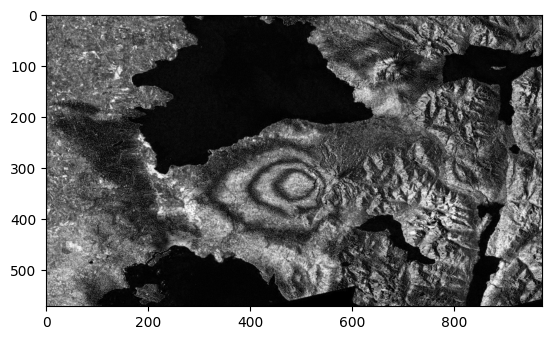

In [9]:
plt.imshow(b, cmap = 'gray')

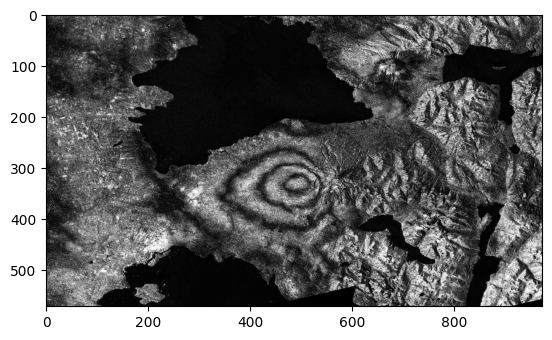

In [10]:
plt.imshow(g, cmap = 'gray')

In [11]:
# alternative approach
b = image[:,:,0]

In [12]:
import copy

image2 = copy.deepcopy(image)

In [13]:
image2[50:100,50:100] = [0,0,0]

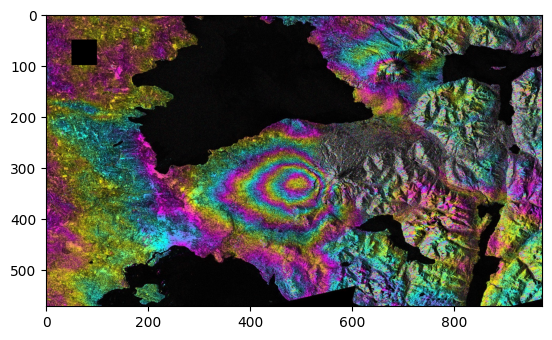

In [14]:
plt.imshow(image2)

In [15]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

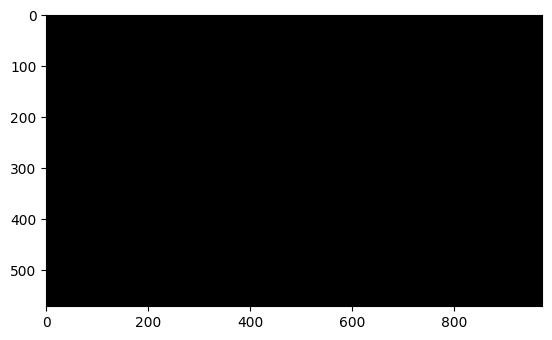

In [16]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [17]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [18]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [19]:
image_gray[0,0]

np.uint8(40)

In [20]:
image_gray.shape

(572, 974)

In [21]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [22]:
image_hsv.shape

(572, 974, 3)

In [23]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [24]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [25]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [26]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [27]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

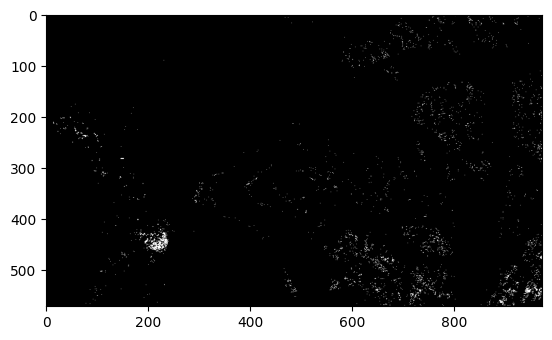

In [28]:
plt.imshow(thresh1, cmap='gray')

In [29]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [30]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

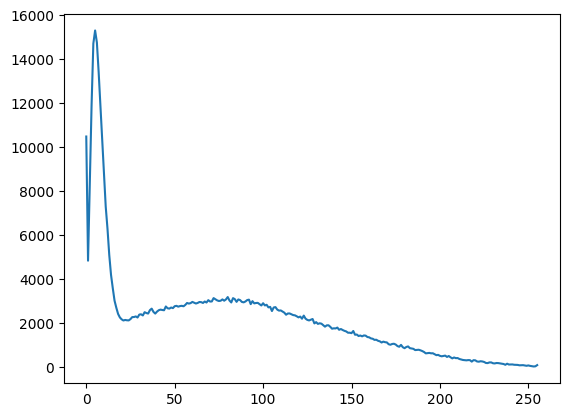

In [31]:
plt.plot(b_hist)

In [32]:
b_hist_cum = b_hist.cumsum()

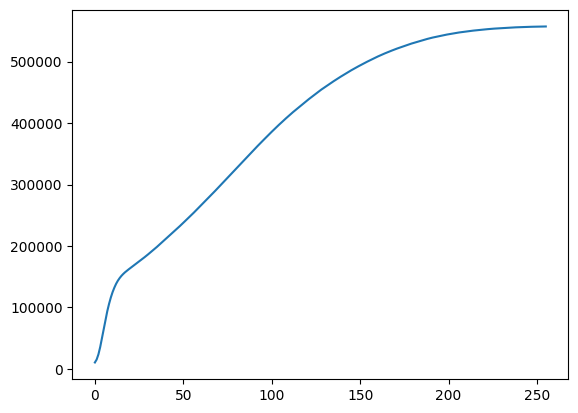

In [33]:
plt.plot(b_hist_cum)

In [34]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

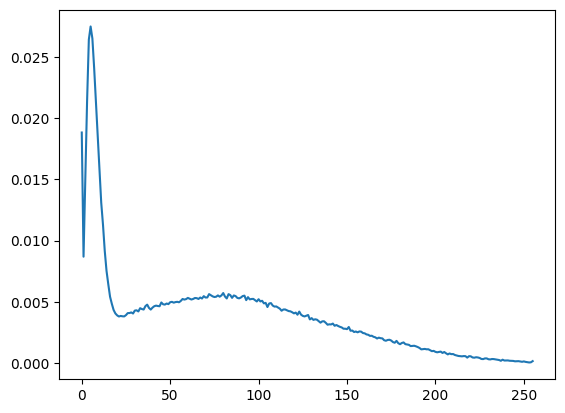

In [35]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [36]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


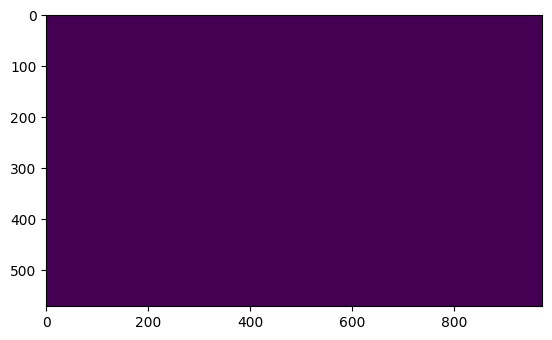

In [37]:
plt.imshow(diff)

In [38]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [39]:
mean = image_gray.mean()

In [40]:
std = image_gray.std()

In [41]:
print(mean,std)

67.41225535245043 52.016191875959635


In [42]:
eq_gray = cv2.equalizeHist(image_gray)

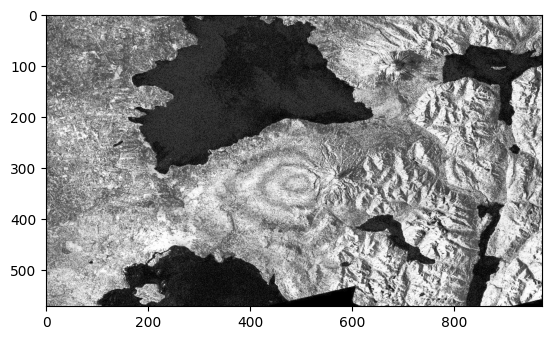

In [43]:
plt.imshow(eq_gray, cmap="gray")


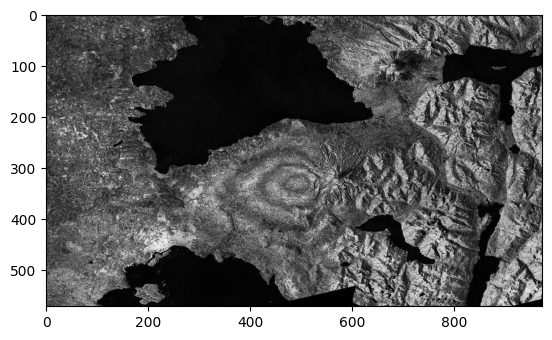

In [44]:
plt.imshow(image_gray, cmap="gray")

In [ ]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


# Домашнее задание

## 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.

In [45]:
image3 = cv2.imread('sar_1_gray.jpg')

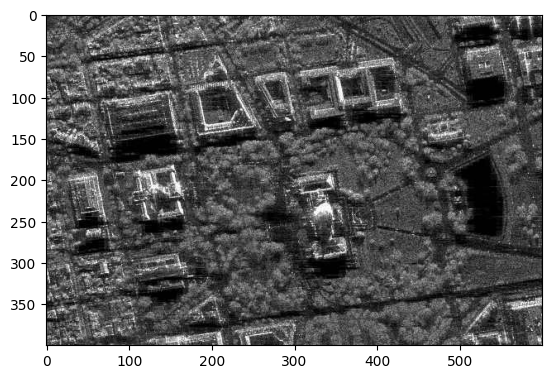

In [46]:
plt.imshow(image3)

## 2. Постройте гистограмму

In [47]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

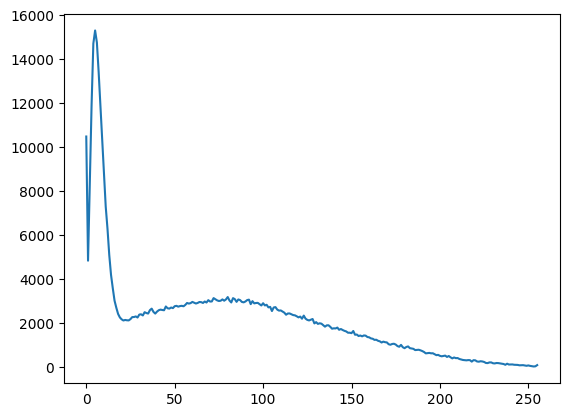

In [48]:
plt.plot(b_hist)

In [49]:
b_hist_cum = b_hist.cumsum()

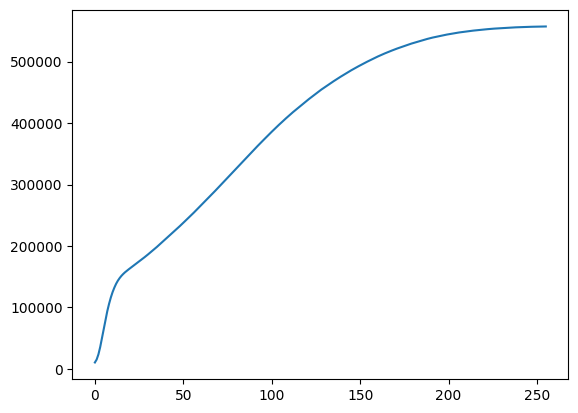

In [50]:
plt.plot(b_hist_cum)

In [51]:
b_hist_norm = b_hist /  (image3.shape[0] * image3.shape[1])

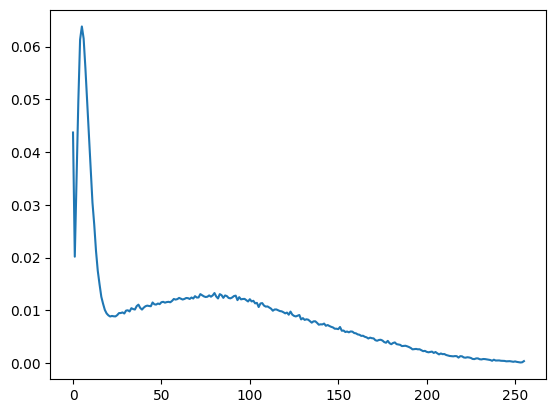

In [52]:
plt.plot(b_hist_norm)

## 3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, 1>.

In [54]:
image4 = copy.deepcopy(image3)

In [55]:
gamma_low = 0.5
image_gamma_low = np.array(255 * (image4 / 255.0) ** gamma_low, dtype='uint8')

In [56]:
gamma_high = 1.5
image_gamma_high = np.array(255 * (image4 / 255.0) ** gamma_high, dtype='uint8')

### Исходное изображение

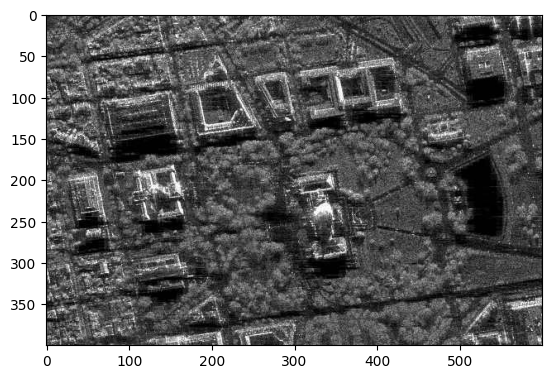

In [57]:
plt.imshow(image4)

### Гамма 0.5

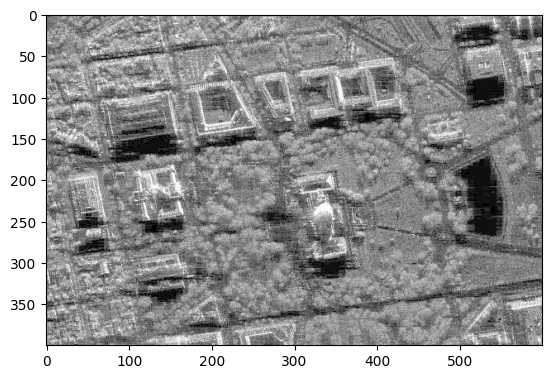

In [58]:
plt.imshow(image_gamma_low)

### Гамма 1.5

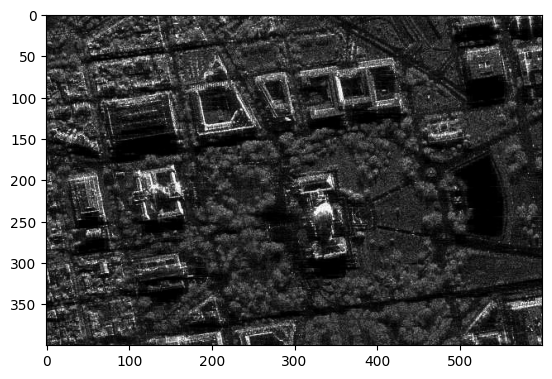

In [59]:
plt.imshow(image_gamma_high)

## 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.

In [60]:
image4_gray = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY) 
image_gamma_low_gray = cv2.cvtColor(image_gamma_low, cv2.COLOR_BGR2GRAY) 

In [61]:
(ssim_low, diff_low) = structural_similarity(image4_gray, image_gamma_low_gray, full=True)
diff_low = (diff_low * 255).astype("uint8")

print("SSIM: {}".format(ssim))

SSIM: 1.0


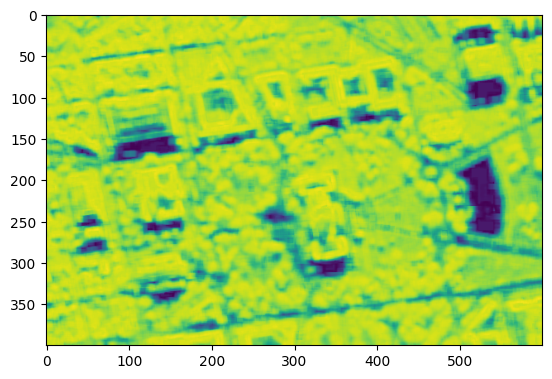

In [62]:
plt.imshow(diff_low)

In [63]:
image_gamma_high_gray = cv2.cvtColor(image_gamma_high, cv2.COLOR_BGR2GRAY) 

In [64]:
(ssim_high, diff_high) = structural_similarity(image4_gray, image_gamma_high_gray, full=True)
diff_high = (diff_high * 255).astype("uint8")

print("SSIM: {}".format(ssim))

SSIM: 1.0


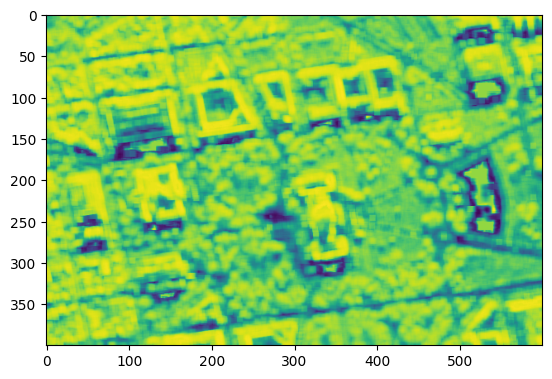

In [65]:
plt.imshow(diff_high)


In [66]:
mse_low = mean_squared_error(image4_gray, image_gamma_low_gray)
print("MSE: {}".format(mse_low))

MSE: 3250.429145833333


In [67]:
mse_high = mean_squared_error(image4_gray, image_gamma_high_gray)
print("MSE: {}".format(mse_high))

MSE: 971.8206541666667


## 5. Реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.

In [73]:
eq_gray = cv2.equalizeHist(image4_gray)

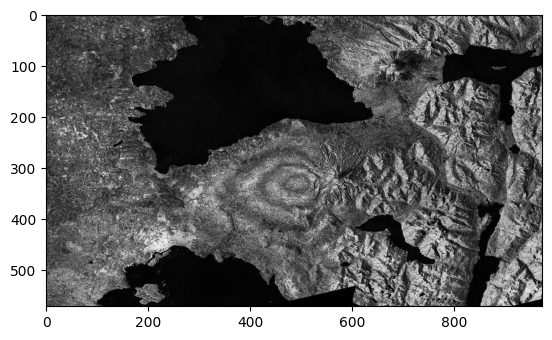

In [74]:
eq_gray = cv2.equalizeHist(image_gray)
plt.imshow(eq_gray, cmap="gray")
plt.imshow(image_gray, cmap="gray")

In [75]:
mean = image_gray.mean()
std = image_gray.std()

mean_ref = eq_gray.mean()
std_ref = eq_gray.std()

mean_src = image4_gray.mean()
std_src = image4_gray.std()

In [76]:
print(mean_src, std_src)

74.94157083333333 43.658465466227916


In [77]:
print(mean_ref, std_ref)

127.64575286110194 73.46412531208956


In [81]:
image4_stat_corr = (image4_gray - mean_src) * (std_ref / std_src) + mean_ref
image4_stat_corr = np.clip(image4_stat_corr, 0, 255).astype(np.uint8)

### Исходное изображение

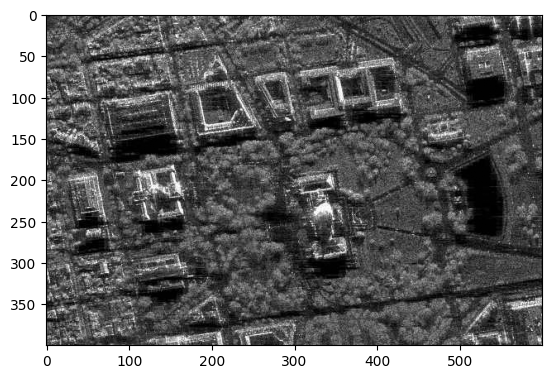

In [78]:
plt.imshow(image4_gray, cmap="gray")

### EqualizeHist (эталон)

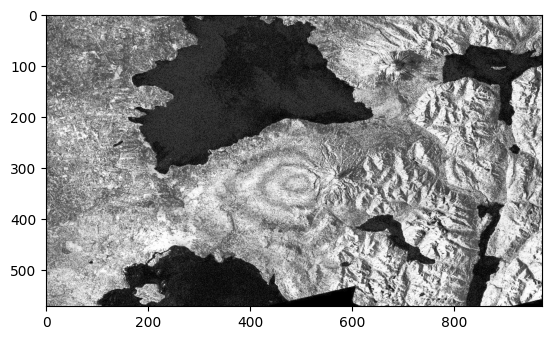

In [79]:
plt.imshow(eq_gray, cmap="gray")

### Статистическая коррекция

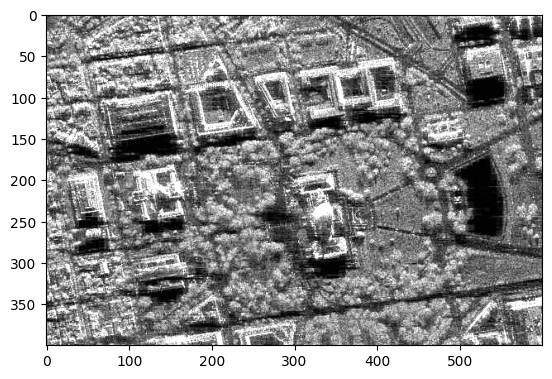

In [82]:
plt.imshow(image4_stat_corr, cmap="gray")

## 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.

np.uint64(0)

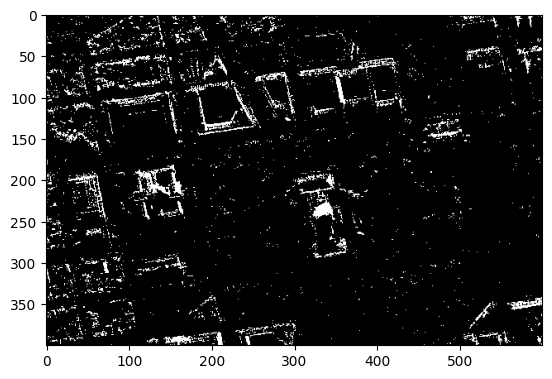

In [83]:
_, thresh_bin = cv2.threshold(image4_gray, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_bin, cmap='gray')
thresh_bin[thresh_bin==100].sum()

np.uint64(0)

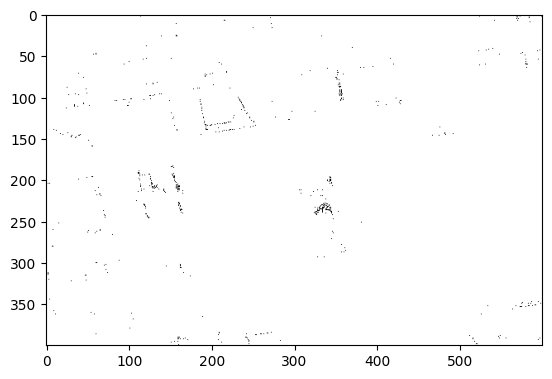

In [84]:
_, thresh_bin_inv = cv2.threshold(image4_gray, 250, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh_bin_inv, cmap='gray')
thresh_bin_inv[thresh_bin_inv==100].sum()

np.uint64(5728800)

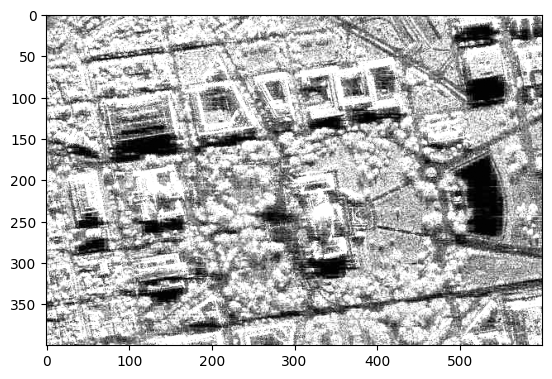

In [85]:
_, thresh_trunc = cv2.threshold(image4_gray, 100, 255, cv2.THRESH_TRUNC)
plt.imshow(thresh_trunc, cmap='gray')
thresh_trunc[thresh_trunc==100].sum()

np.uint64(0)

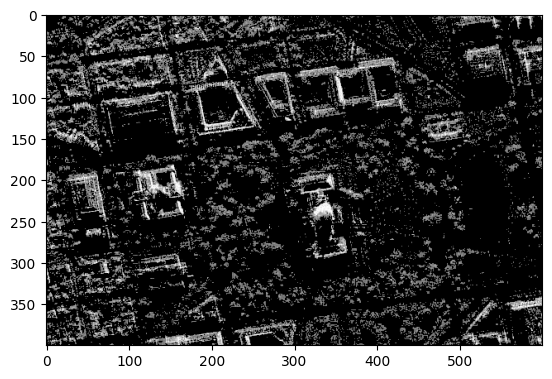

In [86]:
_, thresh_tozero = cv2.threshold(image4_gray, 100, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh_tozero, cmap='gray')
thresh_tozero[thresh_tozero==100].sum()

np.uint64(163500)

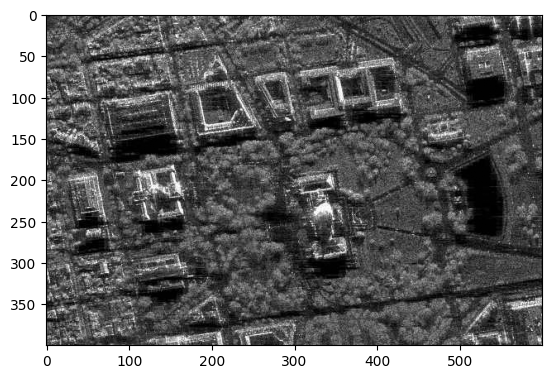

In [87]:
_, thresh_tozero_inv = cv2.threshold(image4_gray, 400, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(thresh_tozero_inv, cmap='gray')
thresh_tozero_inv[thresh_tozero_inv==100].sum()